In [2]:
#importing the packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#reading the dataset
ds = pd.read_csv('../datasets/equake_clean.csv')
print(ds['damaged'].value_counts())
ds.head()

0    228
1     21
Name: damaged, dtype: int64


,Unnamed: 0,name,equake_near,material type,age of bridge,bridge type,magnitude,d to epicenter in miles,damaged,Damage level
0,0,"San Francisco-Oakland Bay Bridge, 1936","1989, Loma Prieta",I,53,III,6.9,59.9,1,0_0_1
1,1,San Francisco-Oakland Bay Bridge,Northern California,I,57,III,4.7,50.0,0,1_0_0
2,2,San Francisco-Oakland Bay Bridge,Bay Area,I,67,III,4.0,6.9,0,1_0_0
3,3,San Francisco-Oakland Bay Bridge,1km N of Piedmont,I,79,III,4.0,6.3,0,1_0_0
4,4,San Francisco-Oakland Bay Bridge,2km SE of Berkeley,I,82,III,4.4,5.4,0,1_0_0


In [4]:
#selecting columns for classification
X = ds.iloc[:, 3:-2].values
y = ds.iloc[:, -2].values

print(X)
print(y)

[['I' 53 'III' 6.9 59.9]
 ['I' 57 'III' 4.7 50.0]
 ['I' 67 'III' 4.0 6.9]
 ...
 ['I' 17 'I' 6.6 56.3]
 ['I' 53 'I' 4.5 26.6]
 ['I' 54 'I' 4.4 45.7]]
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 53 6.9 59.9]
 [1.0 0.0 0.0 ... 57 4.7 50.0]
 [1.0 0.0 0.0 ... 67 4.0 6.9]
 ...
 [1.0 0.0 1.0 ... 17 6.6 56.3]
 [1.0 0.0 1.0 ... 53 4.5 26.6]
 [1.0 0.0 1.0 ... 54 4.4 45.7]]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
#splitting the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [8]:
#converting the quantity into scalar form.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(X_train)
print(y_train)

[[-1.20560706  1.20560706  0.57917445 ...  0.87072676 -0.07747331
  -0.95515724]
 [ 0.82945765 -0.82945765  0.57917445 ...  1.12205828 -0.50993012
  -0.17342711]
 [ 0.82945765 -0.82945765  0.57917445 ... -0.78806132 -0.59642148
  -0.76991314]
 ...
 [ 0.82945765 -0.82945765 -1.72659552 ... -1.03939284  0.26849214
   0.42676379]
 [ 0.82945765 -0.82945765  0.57917445 ...  1.17232459 -0.68291284
  -1.06630371]
 [-1.20560706  1.20560706  0.57917445 ... -0.03406674  1.39287986
  -0.51057139]]
[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [10]:
#importing classification packages.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

SEED = 1

# Classification
lr = LogisticRegression(random_state=SEED)
knn = KNN()
xg = XGBClassifier()
dt = DecisionTreeClassifier(random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt),
               ('Forest', rf),
               ('XGB', xg)]

In [11]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    print('{:s} : {:s}'.format(clf_name, classification_report(y_test, y_pred)))

Logistic Regression :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.50      0.50      0.50         2

    accuracy                           0.95        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.95      0.95      0.95        38

K Nearest Neighbours :               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.00      0.00      0.00         2

    accuracy                           0.95        38
   macro avg       0.47      0.50      0.49        38
weighted avg       0.90      0.95      0.92        38

Classification Tree :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.67      1.00      0.80         2

    accuracy                           0.97        38
   macro avg       0.83      0.99      0.89        38
weighte

C:\Users\gargy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


XGB :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.67      1.00      0.80         2

    accuracy                           0.97        38
   macro avg       0.83      0.99      0.89        38
weighted avg       0.98      0.97      0.98        38



In [12]:
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {:s}'.format(classification_report(y_test, y_pred)))

Voting Classifier:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.67      1.00      0.80         2

    accuracy                           0.97        38
   macro avg       0.83      0.99      0.89        38
weighted avg       0.98      0.97      0.98        38



In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(10,100,20),
    'criterion': ('gini', 'entropy'),
    'max_depth': (3,5,7,9,10),
    'min_samples_split': (2,4,6)
}

In [13]:
RFm = GridSearchCV(RandomForestClassifier(n_jobs = -1, random_state = SEED), param_grid = params, cv = 3, verbose = 3)

In [14]:
RF_grid_model = RFm.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.986, total=   2.4s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.971, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=10, score=0.957, total=   0.1s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30, score=0.986, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=30, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=50, score=0.986, total=   0.2s
[CV] criterion=gini, max_depth=3, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=3, min_samples_split=2, n_estimators=50, score=0.986, total=   0.2s
[CV] criterion=gini, max_depth=3, min_sa

[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=30, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50, score=0.986, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=50, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=70, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=5, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=5, min_samples_split=2, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=5, min_sa

[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=70, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=70, score=0.971, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=70 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90, score=0.971, total=   0.2s
[CV] criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=7, min_samples_split=2, n_estimators=90, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=7, min_sa

[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=90, score=0.972, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=90, score=0.971, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_split=2, n_estimators=90 
[CV]  criterion=gini, max_depth=9, min_samples_split=2, n_estimators=90, score=0.957, total=   0.3s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10, score=0.972, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10, score=0.986, total=   0.1s
[CV] criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=9, min_samples_split=4, n_estimators=10, score=0.957, total=   0.1s
[CV] criterion=gini, max_depth=9, min_sa

[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=10, score=0.986, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=10 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=10, score=0.957, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30, score=0.986, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=30, score=0.957, total=   0.2s
[CV] criterion=gini, max_depth=10, min_samples_split=4, n_estimators=50 
[CV]  criterion=gini, max_depth=10, min_samples_split=4, n_estimators=50, score=0.972, total=   0.2s
[CV] criterion=gini, max_dept

[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=30, score=0.958, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=30, score=0.971, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=30 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=30, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50, score=0.972, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, min_samples_split=4, n_estimators=50, score=0.957, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=30, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.972, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=50, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=70, score=0.972, total=   0.2s
[CV] criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=5, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=50, score=0.986, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=50 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=50, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70, score=0.972, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=7, min_samples_split=4, n_estimators=90, score=0.972, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=70, score=0.972, total=   0.3s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90, score=0.972, total=   0.3s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90, score=0.971, total=   0.2s
[CV] criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=9, min_samples_split=4, n_estimators=90, score=0.957, total=   0.2s
[CV] cr

[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=70 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=70, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90, score=0.972, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90, score=0.971, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90 
[CV]  criterion=entropy, max_depth=10, min_samples_split=4, n_estimators=90, score=0.957, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=10 
[CV]  criterion=entropy, max_depth=10, min_samples_split=6, n_estimators=10, score=0.986, total=   0

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.5min finished


In [16]:
RF_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [17]:
RF_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [18]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [19]:
y_pred = RF_model.predict(X_test)

In [20]:
cc = print('Random Forest: {:s}'.format(classification_report(y_test, y_pred)))

Random Forest:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.67      1.00      0.80         2

    accuracy                           0.97        38
   macro avg       0.83      0.99      0.89        38
weighted avg       0.98      0.97      0.98        38



In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[35  1]
 [ 0  2]]


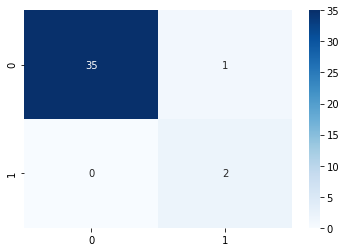

In [58]:
import seaborn as sns
sns_plot = sns.heatmap(cm, annot=True, cmap = 'Blues')
figure = sns_plot.get_figure()
figure.savefig("../Outputs/matrix.png", dpi = 1000)

In [1]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs, multi_class="ovr")
lr_auc = roc_auc_score(y_test, y_pred)
print('Guessing: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Guessing')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='RF')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.savefig("../Outputs/ROC.png", dpi = 1000)

NameError: name 'y_test' is not defined